# Jupyter notebook to test MLFF models 

In [1]:
import inference_functions as ifs
import importlib
import pandas as pd

In [5]:
importlib.reload(ifs)

<module 'inference_functions' from '/mnt/e/Documents/GitHub/MLFF_training/Inference/inference_functions.py'>

## Runs Inference for Mace and Chgnet

### Parse test set

In [7]:
filepath = '/home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)


Processing:   4%|▍        | 9/208 [00:00<00:16, 11.74it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/53/OUTCAR
Error details: could not convert string to float: '********'


Processing:  46%|███▋    | 95/208 [00:09<00:09, 11.44it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/44/OUTCAR
Error details: could not convert string to float: '********'


Processing:  65%|████▌  | 136/208 [00:13<00:05, 12.52it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/136/OUTCAR
Error details: could not convert string to float: '0.000000000122.544521982'


Processing: 100%|███████| 208/208 [00:20<00:00, 10.11it/s]


### Run inference using MLFF

In [12]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar',calc_correlation=True)


Running CHgnet


In [13]:
df_0407

,File,DFT E,MLFF E,ΔE,DFT Forces,MLFF Forces,Forces MSE,natom,DFT Rank,MLFF Rank
0,struct5_natom4,-7.818,-8.301,0.483,-8.333333e-08,1.490116e-08,0.398,4,1,1
1,struct1_natom4,-7.743,-8.301,0.558,0.000000e+00,-1.893689e-08,0.000,4,2,1
2,struct3_natom4,-6.854,-7.546,0.692,0.000000e+00,-7.947286e-08,1.682,4,5,3
3,struct2_natom4,-6.824,-6.876,0.052,0.000000e+00,-2.360927e-08,0.000,4,6,6
4,struct4_natom4,-5.824,-6.425,0.601,0.000000e+00,-1.940837e-07,0.000,4,9,9
5,struct3_natom16,-6.967,-7.531,0.564,0.000000e+00,2.296444e-08,0.000,16,3,4
6,struct2_natom16,-6.870,-7.121,0.252,0.000000e+00,0.000000e+00,0.096,16,4,5
7,struct5_natom16,-6.510,-6.874,0.364,0.000000e+00,2.483527e-08,1.269,16,7,7
8,struct4_natom16,-6.418,-6.571,0.153,0.000000e+00,-1.986822e-08,0.428,16,8,8
9,struct1_natom16,-1.943,-3.471,1.528,0.000000e+00,-7.947286e-08,15.250,16,15,15


In [8]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar',calc_correlation=True)
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar',calc_correlation=True)
df_0429 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar')
df_0529 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/relaxed_052924-290524.p/bestE_epoch26_e383_f495_s1317_mNA.pth.tar',calc_correlation=True)
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_long68 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/long_68_aimd-120524/bestE_epoch20_e2_f52_s37_mNA.pth.tar',calc_correlation=True)
df_long0526 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/data_052624_mixed-290524.p/bestE_epoch28_e56_f272_s755_mNA.pth.tar',calc_correlation=True)
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar',calc_correlation=True)
df_061024 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_data_060924-090624.p/bestE_epoch43_e82_f300_s1347_mNA.pth.tar',calc_correlation=True)
df_binary = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar',calc_correlation=True)
df_mace = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model',mace_flag=True,calc_correlation=True)
df_mace_small = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/L0-small.model',mace_flag=True,calc_correlation=True)
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True,calc_correlation=True)
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar',calc_correlation=True)
all_data_2 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar',calc_correlation=True)
all_data_3 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar',calc_correlation=True ) 


Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running MACE
Running MACE
Running MACE
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet


In [17]:
df_72624 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/72624-2024-07-26-12-25-58/bestF_epoch29_e20_f201_s67_mNA.pth.tar',calc_correlation=True ) 

Running CHgnet


## Example of a MLFF model Dataframe 

In [16]:
all_data_1

,File,DFT E,MLFF E,ΔE,DFT Forces,MLFF Forces,Forces MSE,natom,DFT Rank,MLFF Rank
0,78,-7.951,-8.032,0.082,0.000000e+00,-1.986822e-08,0.419,64,1,1
1,209,-7.946,-7.966,0.020,7.372575e-18,6.907309e-09,0.062,64,2,2
2,161,-7.943,-7.924,-0.019,0.000000e+00,9.934108e-09,0.275,64,3,4
3,39,-7.866,-7.926,0.060,3.700743e-17,9.934108e-09,0.132,64,4,3
4,82,-7.654,-7.731,0.076,0.000000e+00,5.960464e-08,0.315,64,5,6
...,...,...,...,...,...,...,...,...,...,...
200,292,-0.077,-0.932,0.855,-3.700743e-17,-1.589457e-07,20.203,64,201,202
201,256,-0.035,-3.488,3.453,-3.125000e-08,-7.152557e-07,27410.062,64,202,175
202,229,-0.028,-0.259,0.231,-1.041667e-08,-7.947286e-08,58.924,64,203,204
203,289,1.943,-0.804,2.747,-6.661338e-16,7.947286e-08,232.590,64,204,203


In [18]:
df_72624

,File,DFT E,MLFF E,ΔE,DFT Forces,MLFF Forces,Forces MSE,natom,DFT Rank,MLFF Rank
0,78,-7.951,-8.276,0.326,0.000000e+00,-1.986822e-08,1.168000e+00,64,1,4
1,209,-7.946,-8.361,0.415,7.372575e-18,3.104409e-09,3.460000e-01,64,2,3
2,161,-7.943,-8.205,0.263,0.000000e+00,4.967054e-08,6.500000e-01,64,3,5
3,39,-7.866,-8.502,0.636,3.700743e-17,-7.450581e-09,1.888000e+00,64,4,2
4,82,-7.654,-8.090,0.436,0.000000e+00,-3.973643e-08,9.548000e+00,64,5,8
...,...,...,...,...,...,...,...,...,...,...
200,292,-0.077,-4.810,4.733,-3.700743e-17,-6.953875e-08,2.320060e+02,64,201,151
201,256,-0.035,115.812,-115.847,-3.125000e-08,7.120768e-05,1.170272e+09,64,202,205
202,229,-0.028,-2.004,1.976,-1.041667e-08,-2.781550e-07,3.459500e+02,64,203,202
203,289,1.943,-4.436,6.379,-6.661338e-16,-2.384186e-07,4.168250e+02,64,204,172


## Graphs comparing inference on a test set

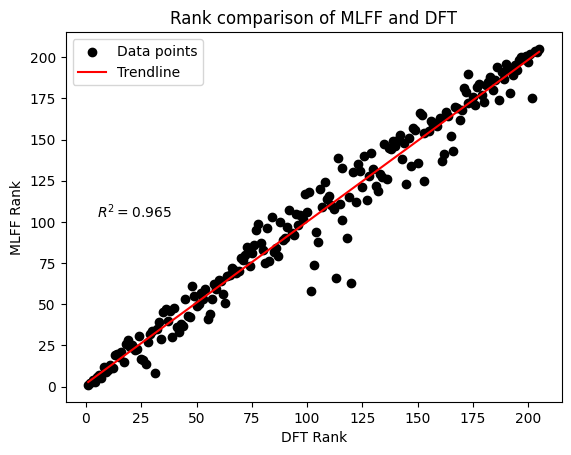

In [29]:
ifs.plot_mlff_dft_rank(all_data_1)

In [26]:
dataframes = [df_0407,df_0415,df_0429,df_0529,df_0415,df_long68,df_long0526,df_061024,df_mace_small,df_clean_relaxed,all_data_1,all_data_2,all_data_3]
dataframe_names = ['April 4th', 'April 15th','April 29th', 'May 29th','AIMD','May 26 mixed','All AIMD','June 10th','Mace small','Clean relaxed MACE','All data 1','All data 2','All data 3',]

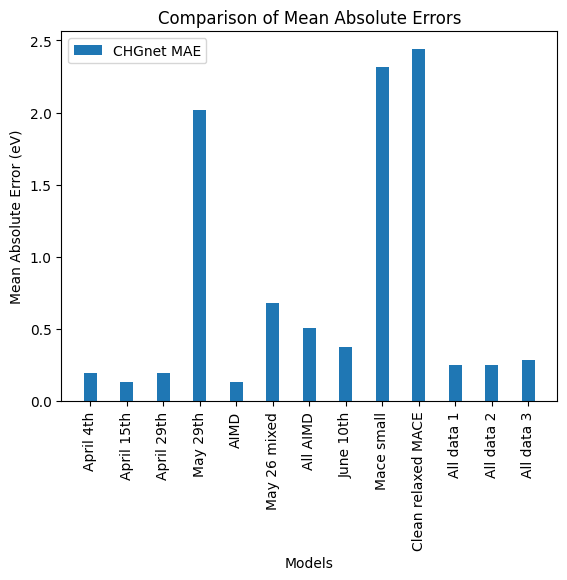

In [27]:
ifs.plot_mae_comparison(dataframes,dataframe_names)

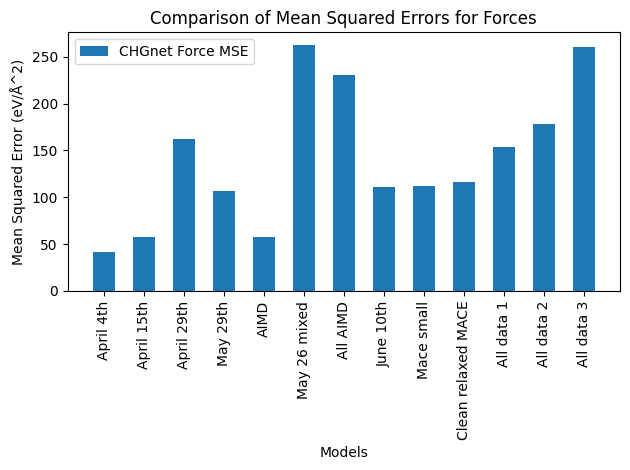

In [28]:
ifs.plot_mse_comparison(dataframes,dataframe_names)

## Running Geometry optimization with Chgnet

### June 21st model on natoms64 NbOC

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.728, DFT = 5.193, Difference (DFT - MLFF) = -0.535
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


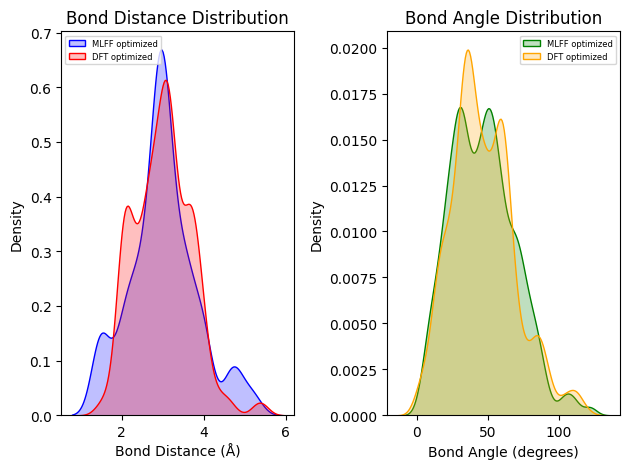

In [27]:
model_path = '/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/vasp/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [28]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th model on natoms64 NbOC 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th , binary AIMD data

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### June 10th binary, best forces model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestF_epoch26_e75_f275_s1335_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

### 04/29 Model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### Only binary oxides trained. 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

## MACE optimization 

In [40]:
model_path = '/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1245.567, DFT = 1245.567, Difference (DFT - MLFF) = 0.0
Distance between atoms 0 and 1: MLFF = 3.924, DFT = 3.924, Difference (DFT - MLFF) = 0.0
Lattice parameters a: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters b: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters c: MLFF = 8.991, DFT = 8.991, Difference (DFT - MLFF) = 0.0


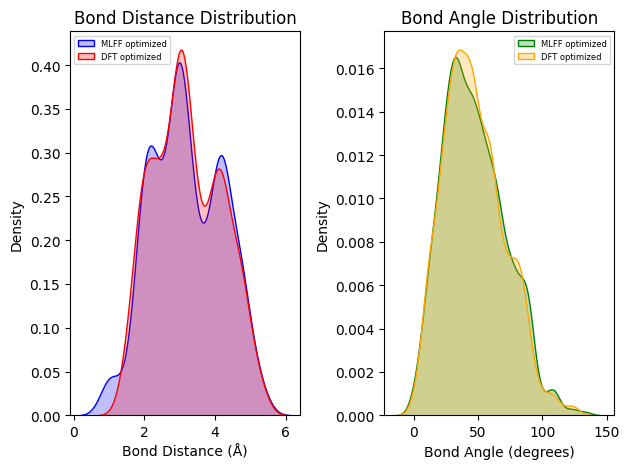

In [43]:
ifs.plot_bond_distributions(struct,last_struct)

In [37]:
model_path = '/home/nacho/NbOC/MACE/clean_relaxed.model'
outcar_path = '/home/nacho/NbOC/vasp/test_set/NbOC/finished_calcs/1/OUTCAR'
opt_struct,dft_struct = ifs.mace_optimize(model_path,outcar_path,fmax=.001,verbose=False)


No dtype selected, switching to float32 to match model dtype.
      Step     Time          Energy          fmax
FIRE:    0 13:45:44     -517.774963       39.052522
FIRE:    1 13:45:44     -540.298157       18.797431
FIRE:    2 13:45:45     -550.775208        7.657619
FIRE:    3 13:45:45     -555.061096        4.764338
FIRE:    4 13:45:45     -556.721680        4.018678
FIRE:    5 13:45:45     -557.449646        3.575741
FIRE:    6 13:45:45     -557.901672        3.786229
FIRE:    7 13:45:45     -558.281494        3.715711
FIRE:    8 13:45:45     -558.679565        3.558401
FIRE:    9 13:45:45     -559.221680        3.424344
FIRE:   10 13:45:45     -560.109314        3.442173
FIRE:   11 13:45:45     -561.537903        3.631124
FIRE:   12 13:45:45     -563.580505        3.776081
FIRE:   13 13:45:45     -566.125793        3.735876
FIRE:   14 13:45:45     -568.897522        3.357370
FIRE:   15 13:45:45     -571.511597        2.511504
FIRE:   16 13:45:45     -573.541138        2.139961
FIRE

In [38]:
ifs.optimization_summary(opt_struct,dft_struct)

MLFF vs DFT comparison:
Volume: MLFF = 1245.567, DFT = 1245.567, Difference (DFT - MLFF) = 0.0
Distance between atoms 0 and 1: MLFF = 4.688, DFT = 3.924, Difference (DFT - MLFF) = -0.764
Lattice parameters a: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters b: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters c: MLFF = 8.991, DFT = 8.991, Difference (DFT - MLFF) = 0.0


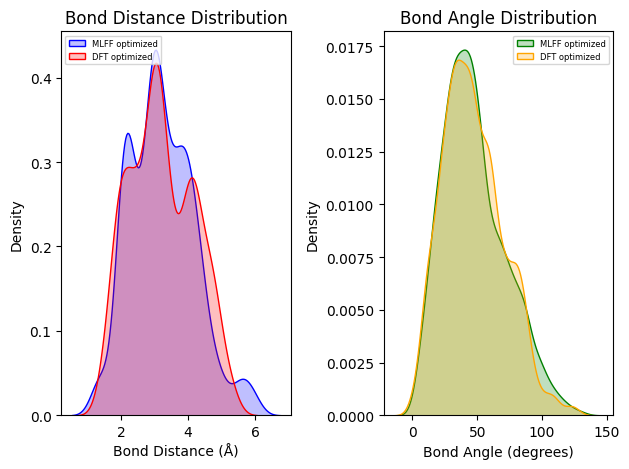

MLFF vs DFT comparison:
Volume: MLFF = 1245.567, DFT = 1245.567, Difference (DFT - MLFF) = 0.0
Distance between atoms 0 and 1: MLFF = 4.688, DFT = 3.924, Difference (DFT - MLFF) = -0.764
Lattice parameters a: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters b: MLFF = 11.77, DFT = 11.77, Difference (DFT - MLFF) = 0.0
Lattice parameters c: MLFF = 8.991, DFT = 8.991, Difference (DFT - MLFF) = 0.0


In [39]:
ifs.plot_bond_distributions(opt_struct,dft_struct)
ifs.optimization_summary(opt_struct,dft_struct)

## Active Learning: Testing the variance of models.

In [34]:
import os 

model1 = dir + 'all_data_binary_061024-1706241.p/bestE_epoch26_e74_f281_s1351_mNA.pth.tar'
model2 = dir + 'all_data_binary_061024-1706242.p/bestE_epoch49_e75_f279_s1289_mNA.pth.tar'
model3 = dir + 'all_data_binary_061024-1706243.p/bestE_epoch36_e73_f275_s1306_mNA.pth.tar'

stds_old = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_old.append(std)
    print(file,std)

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'str'

In [35]:
model1='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
model2='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar'
model3='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar'

stds_new = []
files = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_new.append(std)
    files.append(file)
    print(file,std)

FileNotFoundError: [Errno 2] No such file or directory: '/home/nacho/NbOC/VASP/test_set/finished_calcs/'

In [36]:
len(stds_old)

NameError: name 'stds_old' is not defined

In [37]:
# X-axis labels
# X-axis labels


std_devs_1 = stds_new
std_devs_2 = stds_old

x_labels = ['struct1_natom4', 'test', 'struct5_natom256', 'struct4_natom16', 'struct5_natom4', 
            'struct2_natom16', 'struct2_natom64', 'struct3_natom256', 'struct4_natom256', 
            'struct4_natom4', 'struct1_natom16', 'struct2_natom4', 'struct3_natom16', 
            'struct3_natom4', 'struct3_natom64', 'struct5_natom16']

x_labels = files

# Indices for the x-axis
indices = np.arange(len(std_devs_1))

# Bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(indices - bar_width/2, std_devs_1, bar_width, label='New Model', color='b')
plt.bar(indices + bar_width/2, std_devs_2, bar_width, label='Old Model', color='r')

# Adding titles and labels
plt.title('Comparison of Standard Deviations of Models in the inference of data')
plt.xlabel('Structure')
plt.ylabel('Standard Deviation')
plt.xticks(indices, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'stds_old' is not defined